In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 1 Prepare Data

In [5]:
data = pd.read_csv('data/Crime_Data_2010_2017_clean.csv')

In [6]:
data.columns

Index(['Unnamed: 0', 'DR Number', 'Month', 'Day', 'Year', 'Time Occurred',
       'Area ID', 'Reporting District', 'Crime Code', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code', 'Weapon Used Code',
       'Longitude', 'Latitude'],
      dtype='object')

In [7]:
# remove uneccesary columns
data.drop(columns=['Unnamed: 0', 'DR Number'], inplace=True)
data.head()

,Month,Day,Year,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code,Weapon Used Code,Longitude,Latitude
0,3,11,2013,1800,12,1241,626,30.0,1,17,502.0,400.0,33.9829,-118.3338
1,1,22,2010,2300,20,2071,510,NaN,2,0,101.0,NaN,34.0454,-118.3157
2,3,18,2013,2030,18,1823,510,12.0,2,0,101.0,NaN,33.9420,-118.2717
3,11,10,2010,1800,18,1803,510,NaN,2,0,101.0,NaN,33.9572,-118.2717
4,1,4,2014,2300,21,2133,745,84.0,0,17,501.0,NaN,34.2009,-118.6369


In [8]:
# remove NaN values
#data.isnull().sum()
#data = data.loc[data['Location '].notnull()]
#print(data.groupby('Weapon Used Code')['DR Number'].nunique())
data = data.dropna()
#data.fillna(train.mean(), inplace=True)
data.head()

,Month,Day,Year,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code,Weapon Used Code,Longitude,Latitude
0,3,11,2013,1800,12,1241,626,30.0,1,17,502.0,400.0,33.9829,-118.3338
5,1,8,2013,1400,1,111,110,49.0,1,17,501.0,400.0,34.0591,-118.2412
16,1,2,2013,1420,1,174,624,23.0,0,7,102.0,400.0,34.0431,-118.2536
17,1,2,2013,1430,1,134,626,39.0,1,7,101.0,400.0,34.0503,-118.2504
18,1,2,2013,1500,1,185,624,18.0,1,7,406.0,400.0,34.0352,-118.2583


In [11]:
# reset the index and remove unnecessary columns
data.reset_index(inplace=True)
data.drop(columns=['level_0', 'index'], inplace=True)
#data.drop(columns=['index'], inplace=True)
data.head()

,Month,Day,Year,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code,Weapon Used Code,Longitude,Latitude
0,3,11,2013,1800,12,1241,626,30.0,1,17,502.0,400.0,33.9829,-118.3338
1,1,8,2013,1400,1,111,110,49.0,1,17,501.0,400.0,34.0591,-118.2412
2,1,2,2013,1420,1,174,624,23.0,0,7,102.0,400.0,34.0431,-118.2536
3,1,2,2013,1430,1,134,626,39.0,1,7,101.0,400.0,34.0503,-118.2504
4,1,2,2013,1500,1,185,624,18.0,1,7,406.0,400.0,34.0352,-118.2583


# 2 Visualize data

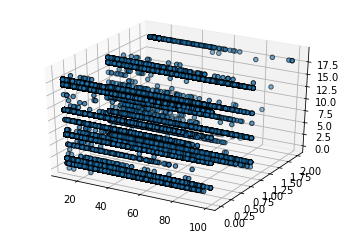

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = data['Victim Age']
ys = data['Victim Sex']
zs = data['Victim Descent']

ax.scatter(xs, ys, zs, edgecolor='k')

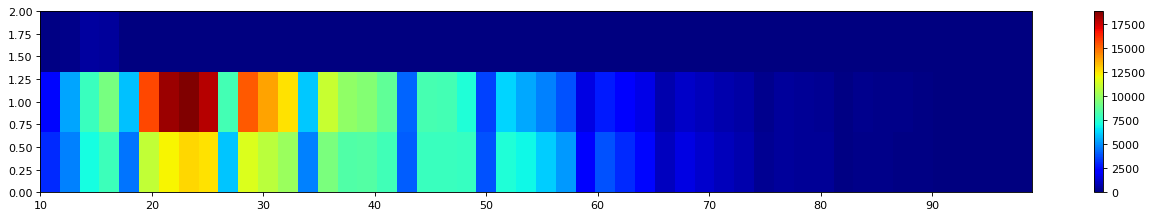

In [13]:
x = data['Victim Age']
y = data['Victim Sex']

plt.figure(figsize=(20, 3), dpi=80)
plt.hist2d(x, y, (50, 3), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

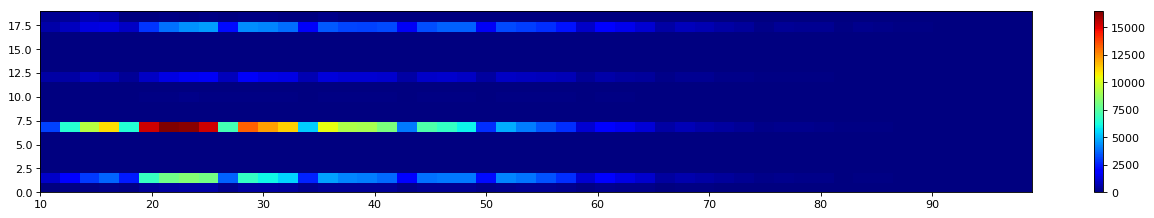

In [14]:
x = data['Victim Age']
y = data['Victim Descent']

plt.figure(figsize=(20, 3), dpi=80)
plt.hist2d(x, y, (50, 18), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

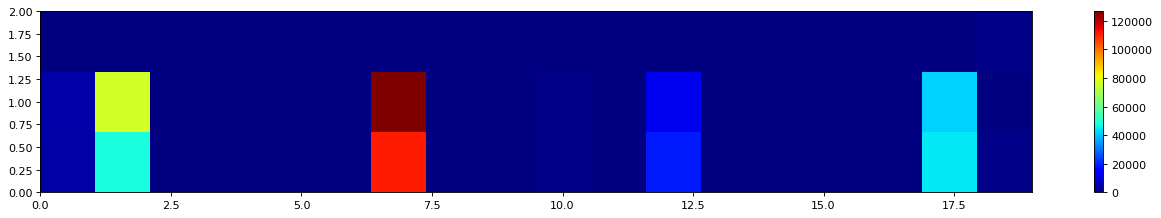

In [15]:
x = data['Victim Descent']
y = data['Victim Sex']

plt.figure(figsize=(20, 3), dpi=80)
plt.hist2d(x, y, (18, 3), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

# 3 Run K-means

In [16]:
# Extra Code stuff
#clust1 = data[data['Cluster Label'] == 1].groupby('Victim Sex')['Time Occurred'].nunique()
#myKMeans.predict(data.iloc[:,:-1][data.index == 0])
#data.iloc[:,:-1][data.index == 0]

In [54]:
myKMeans = KMeans(n_clusters=5)

'''myKMeans.fit(data[['Month', 'Day', 'Year', 'Time Occurred',
       'Area ID', 'Reporting District', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code',
       'Longitude', 'Latitude']]'''

myKMeans.fit(data[['Victim Age', 'Victim Sex', 'Victim Descent']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
#predicted_labels = myKMeans.predict(X_test[['Victim Age', 'Victim Sex', 'Victim Descent']])

In [56]:
# Predict cluster based on Demographics
#myDemo = [[3, 11, 2013, 1800, 12, 1241, 26, 0, 17, 502.0, 33.9829, -118.3338]]
myDemo = [[26, 0, 17]]
myLabel = myKMeans.predict(myDemo)

In [57]:
data['Cluster Label'] = myKMeans.labels_

In [58]:
# myDemo cluster means
for i in data.columns:
    clust = data[data['Cluster Label'] == myLabel[0]].groupby(i)['Time Occurred'].nunique()
    m = clust.idxmax()
    #m = clust.index(clust.mean())
    #display(clust)
    #print(m)
    #break
    print(i, m)

Month 7
Day 6
Year 2016
Time Occurred 1
Area ID 14
Reporting District 646
Crime Code 624
Victim Age 35.0
Victim Sex 0
Victim Descent 17
Premise Code 101.0
Weapon Used Code 400.0
Longitude 34.1016
Latitude -118.3387
Cluster Label 3


In [39]:
myKMeans.inertia_

11917892.481355228

In [52]:
# Find lowest value for k that minimizes the inertia
inertia = []

for i in range(2, 20):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(data[['Victim Age', 'Victim Sex', 'Victim Descent']])
    inertia.append(myKMeans.inertia_)

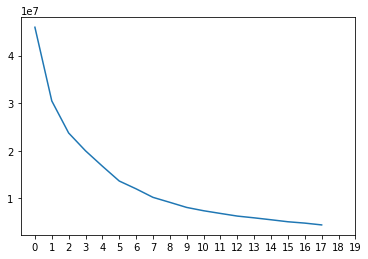

In [53]:
plt.plot(inertia)
plt.xticks(range(0, 20))
plt.show()